In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [38]:
df = pd.read_csv('titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [39]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [40]:
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train.shape , X_test.shape

((712, 3), (179, 3))

In [41]:
X_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [46]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()
mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [50]:
X_train['Mean_age'] = X_train['Age'].fillna(mean_age)
X_train['Median_age'] = X_train['Age'].fillna(median_age)
X_train['Mean_fare'] = X_train['Fare'].fillna(mean_fare)
X_train['Median_fare'] = X_train['Fare'].fillna(median_fare)

In [51]:
X_train.head()

,Age,Fare,Family,Mean_age,Median_age,Mean_fare,Median_fare
30,40.0,27.7208,0,40.0,40.0,27.7208,27.7208
10,4.0,16.7000,2,4.0,4.0,16.7000,16.7000
873,47.0,9.0000,0,47.0,47.0,9.0000,9.0000
182,9.0,31.3875,6,9.0,9.0,31.3875,31.3875
876,20.0,9.8458,0,20.0,20.0,9.8458,9.8458


In [52]:
X_train.cov()

,Age,Fare,Family,Mean_age,Median_age,Mean_fare,Median_fare
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.665205,64.858859
Fare,70.719262,2448.197914,17.258917,55.603719,57.957599,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.146106,-5.112563,16.385048,16.476305
Mean_age,204.349513,55.603719,-5.146106,161.812625,161.812625,52.788341,51.358000
Median_age,204.349513,57.957599,-5.112563,161.812625,161.989566,55.023037,53.553455
Mean_fare,66.665205,2448.197914,16.385048,52.788341,55.023037,2324.238526,2324.238526
Median_fare,64.858859,2448.197914,16.476305,51.358000,53.553455,2324.238526,2340.091022


In [56]:
X_train.describe()

,Age,Fare,Family,Mean_age,Median_age,Mean_fare,Median_fare
count,564.000000,676.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,29.785904,32.617597,0.932584,29.785904,29.570576,32.617597,31.699430
std,14.295087,49.479268,1.653860,12.720559,12.727512,48.210357,48.374487
min,0.420000,0.000000,0.000000,0.420000,0.420000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,23.000000,23.000000,7.925000,7.925000
50%,28.750000,14.458300,0.000000,29.785904,28.750000,15.500000,14.458300
75%,38.250000,31.275000,1.000000,35.000000,35.000000,32.617597,30.500000
max,71.000000,512.329200,10.000000,71.000000,71.000000,512.329200,512.329200


In [53]:
X_train.corr()

,Age,Fare,Family,Mean_age,Median_age,Mean_fare,Median_fare
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.090156,0.087356
Fare,0.092644,1.000000,0.208268,0.088069,0.091757,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.244610,-0.242883,0.205499,0.205942
Mean_age,1.000000,0.088069,-0.244610,1.000000,0.999454,0.086078,0.083461
Median_age,1.000000,0.091757,-0.242883,0.999454,1.000000,0.089673,0.086982
Mean_fare,0.090156,1.000000,0.205499,0.086078,0.089673,1.000000,0.996607
Median_fare,0.087356,1.000000,0.205942,0.083461,0.086982,0.996607,1.000000


In [61]:
print("The Variance of the Age column is", X_train['Age'].var() )
print("The Variance of the Mean_age column is", X_train['Mean_age'].var() )
print("The Variance of the Median_age column is", X_train['Median_age'].var() )
print("\n")
print("The Variance of the Fare column is", X_train['Fare'].var() )
print("The Variance of the Mean_Fare column is", X_train['Mean_fare'].var() )
print("The Variance of the Median_Fare column is", X_train['Median_fare'].var() )

The Variance of the Age column is 204.34951339046142
The Variance of the Mean_age column is 161.81262452718676
The Variance of the Median_age column is 161.98956633460548


The Variance of the Fare column is 2448.1979137063163
The Variance of the Mean_Fare column is 2324.2385256705534
The Variance of the Median_Fare column is 2340.09102197536


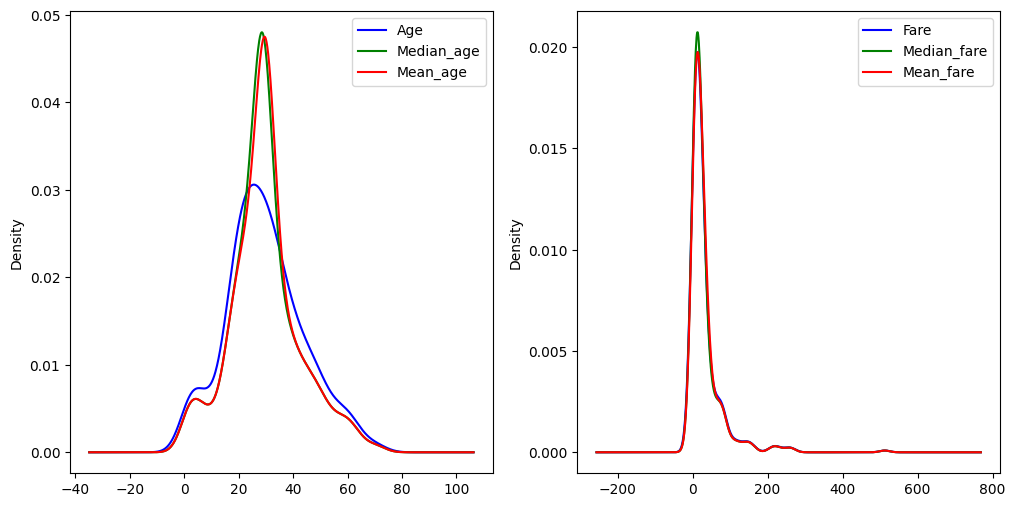

In [74]:
fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(121)

X_train['Age'].plot(kind = 'kde', ax =ax , color = 'blue')
X_train['Median_age'].plot(kind = 'kde', ax =ax , color = 'green')
X_train['Mean_age'].plot(kind = 'kde', ax = ax, color = 'red')

hx = fig.add_subplot(122)
X_train['Fare'].plot(kind = 'kde', ax =hx , color = 'blue')
X_train['Median_fare'].plot(kind = 'kde', ax =hx , color = 'green')
X_train['Mean_fare'].plot(kind = 'kde', ax = hx, color = 'red')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

lines, labels = hx.get_legend_handles_labels()
hx.legend(lines, labels, loc = 'best')

<Axes: >

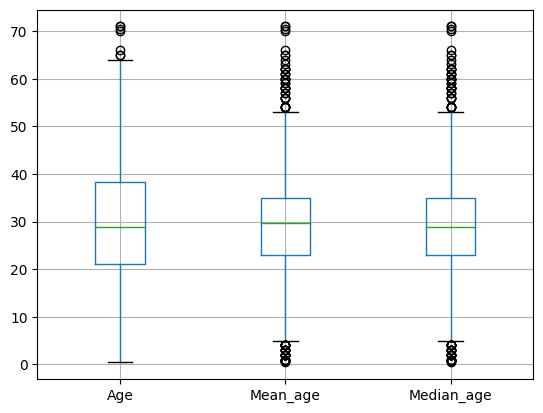

In [77]:
X_train[['Age', 'Mean_age', 'Median_age']].boxplot()

<Axes: >

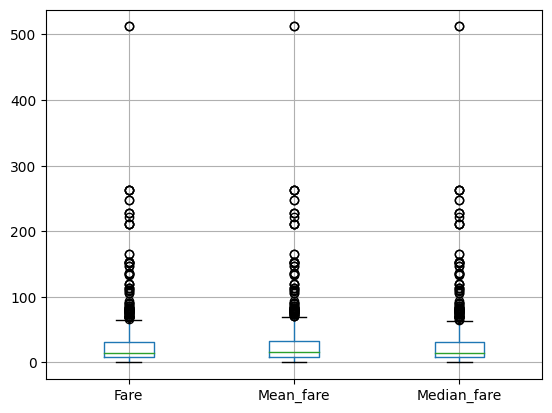

In [78]:
X_train[['Fare', 'Mean_fare', 'Median_fare']].boxplot()

In [79]:
# conclusion: that only in fare case the mean data is acceptable